# **`Rainfall Prediction Using Machine Learning`**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rf = pd.read_csv('/content/weatherAUS.csv.zip')
rf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [ ]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
rf.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
rf.shape

(142193, 24)

In [ ]:
rf.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
rf.isnull().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


So, from above computations we have alot of null values so we will fill these with using mean and mode

In [ ]:
# Fill null values in numerical columns with the mean
numerical_cols = rf.select_dtypes(include=np.number).columns
rf[numerical_cols] = rf[numerical_cols].fillna(rf[numerical_cols].mean())

# Fill null values in categorical columns with the mode
categorical_cols = rf.select_dtypes(include=['object']).columns
for column in categorical_cols:
    rf[column].fillna(rf[column].mode()[0], inplace=True)

In [ ]:
rf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No


In [ ]:
rf.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


EDA helps data scientists understand the data, identify potential issues, and

*   uncover hidden patterns
*   visualize the data and pictorial representation of data.
 trends before applying machine learning algorithms.
Technique:
EDA involves technique like:
Data Visualization: Using plots, graphs, and other visual representations to explore the data.

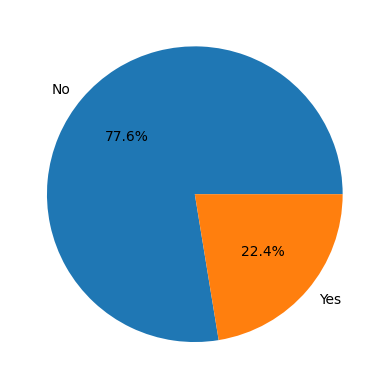

In [ ]:
plt.pie(rf['RainTomorrow'].value_counts().values,
        labels = rf['RainTomorrow'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [ ]:
features = list(rf.select_dtypes(include = np.number).columns)
features.remove('Sunshine')
print(features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


**subplots() function allows us to easily create figure and axes object in a side by side formation. the plt. subplots() returns a tuple containing the figure object and a numpy array of the axes object. i.e when the subplots() function is called it is assigned to two varible that unpack the tuple**

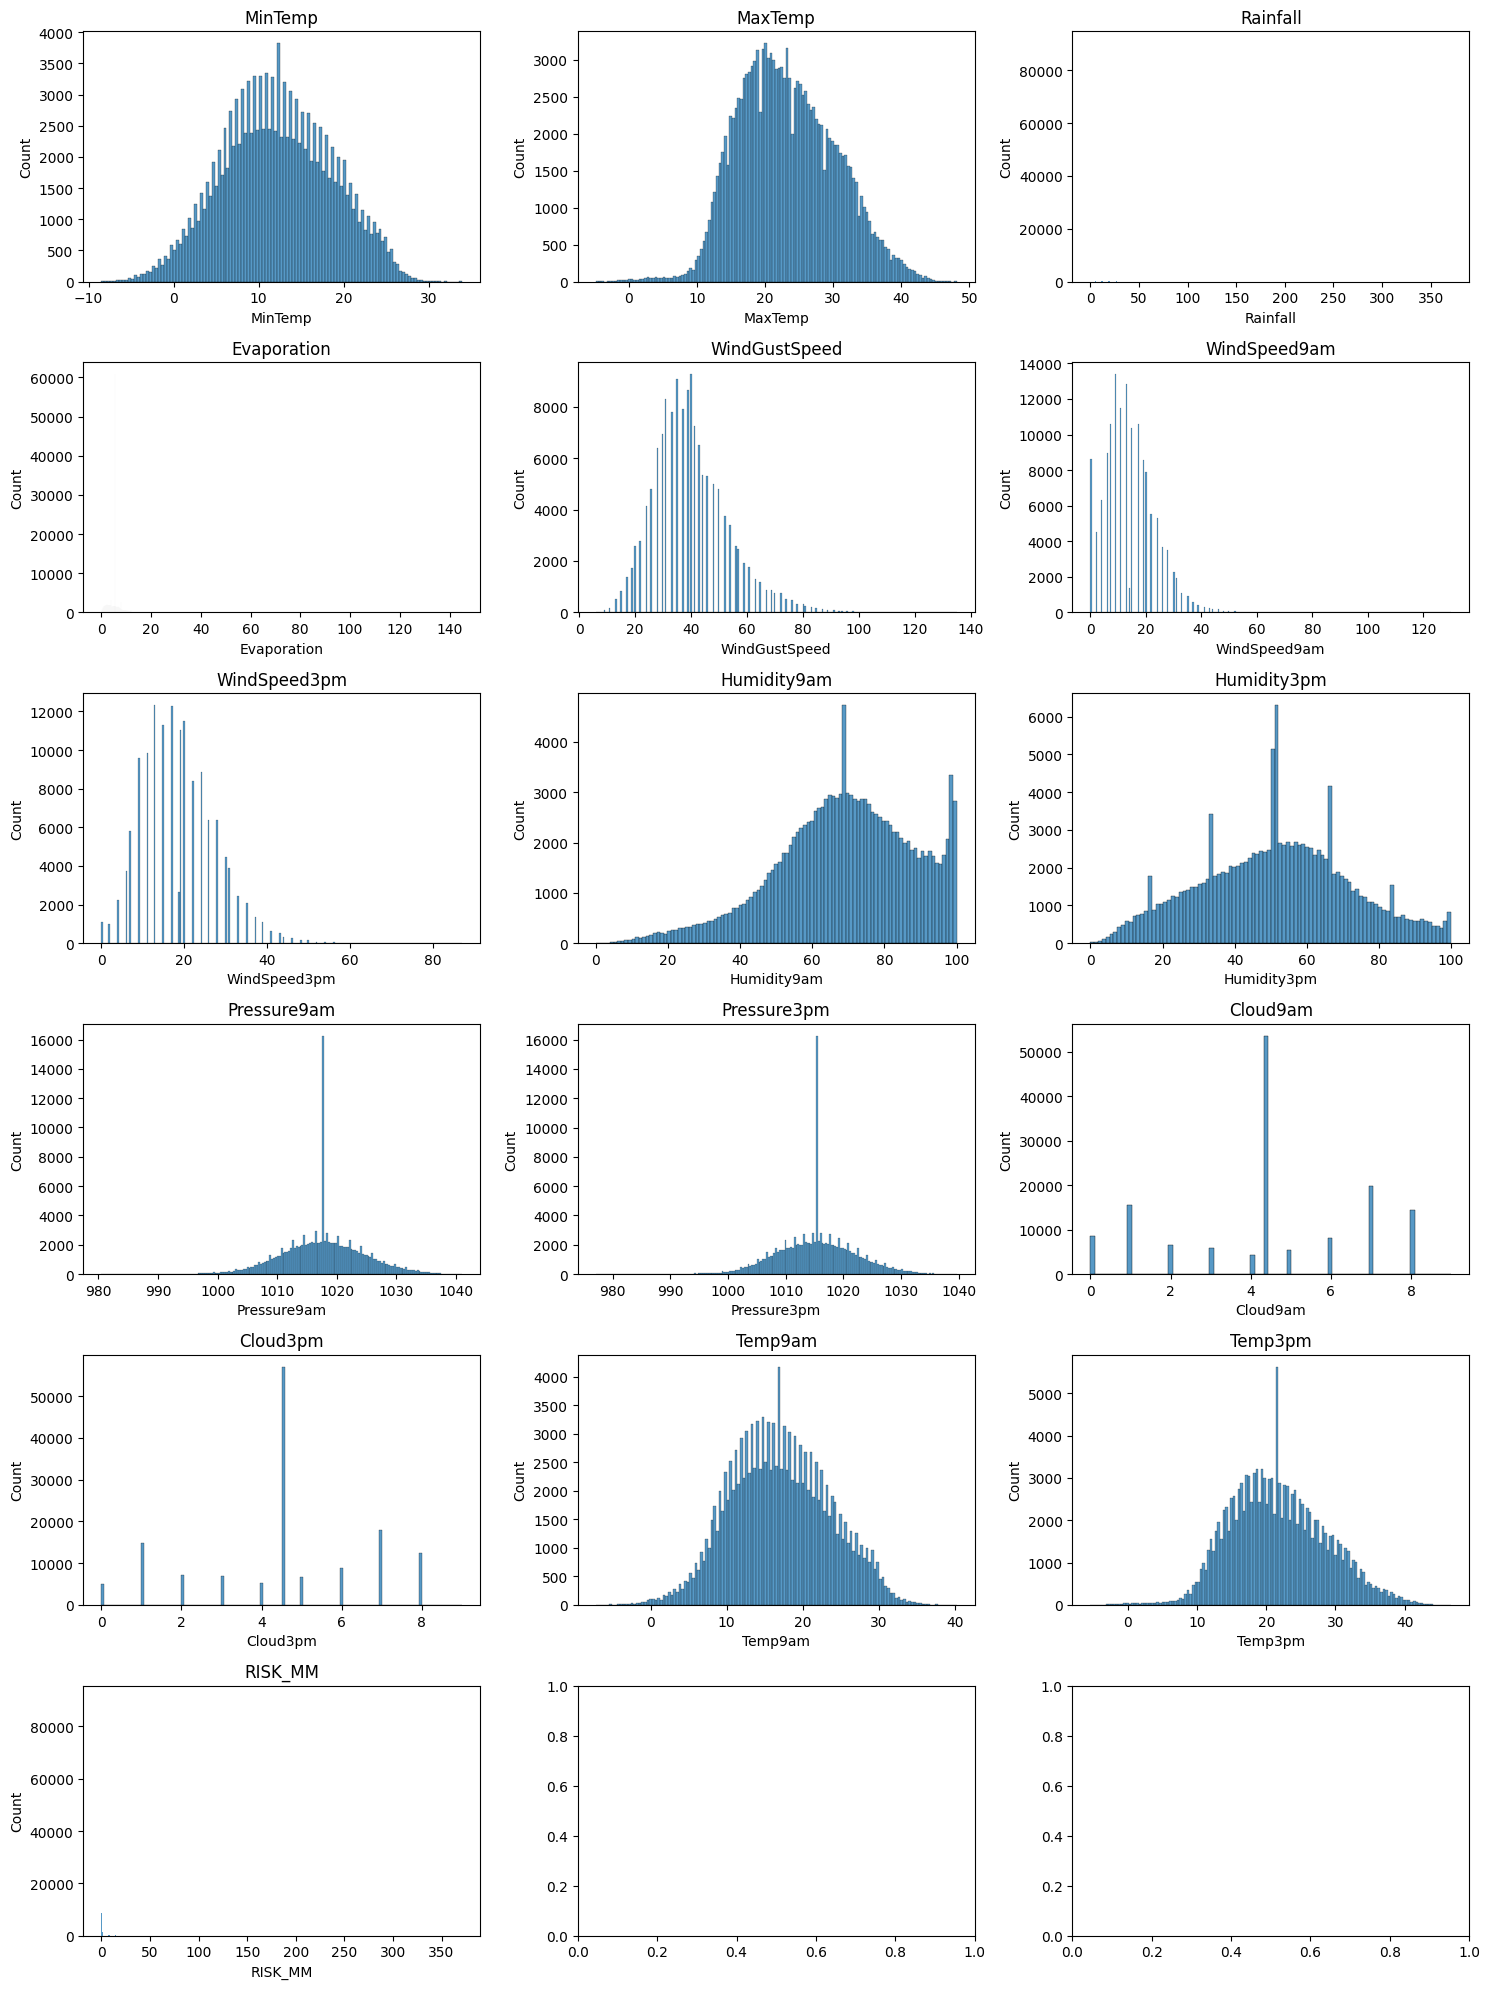

In [ ]:
# Create subplots for all numerical features
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=len(features) // 3 + (len(features) % 3 > 0), ncols=3, figsize=(15, 20))
for i, feature in enumerate(features):
  row = i // 3
  col = i % 3
  sns.histplot(rf[feature], ax=axes[row, col])
  axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()


**Outliers:** Outliers are data points that are noticeably different from other observations in a dataset.


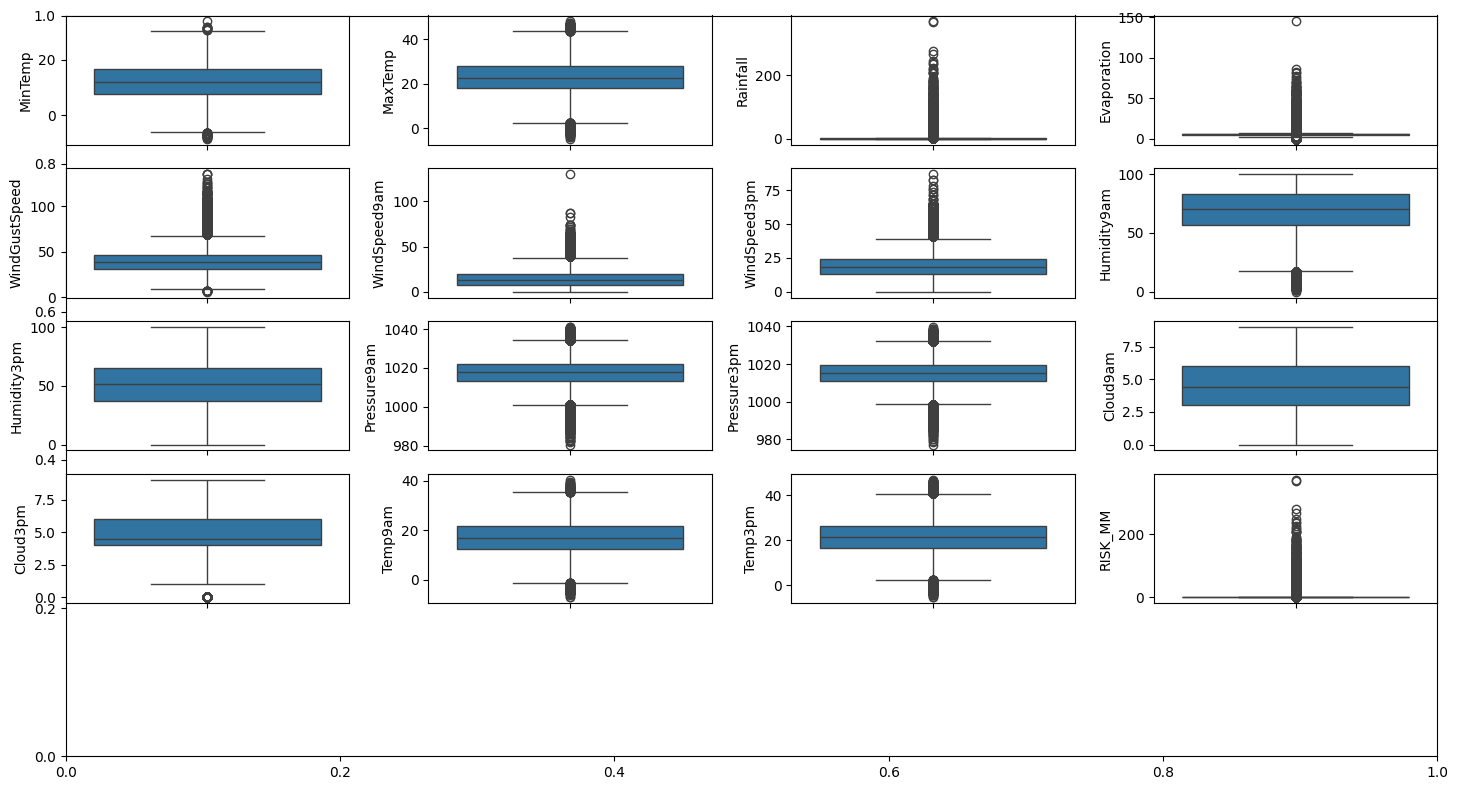

In [ ]:
#for checking outliers
import seaborn as sb
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(5,4, i + 1)
  sb.boxplot(rf[col])
plt.tight_layout()
plt.show() # there are outliers in our dataset but sadly we have not complex data so we can remove this

In [ ]:
rf.replace({'yes':1, 'no':0}, inplace=True) #replacement make the classify data easy in 0/1 form

**HeatMap:**Heatmaps use colors to represent data values, where different shades or intensities of color indicate different levels of magnitude.

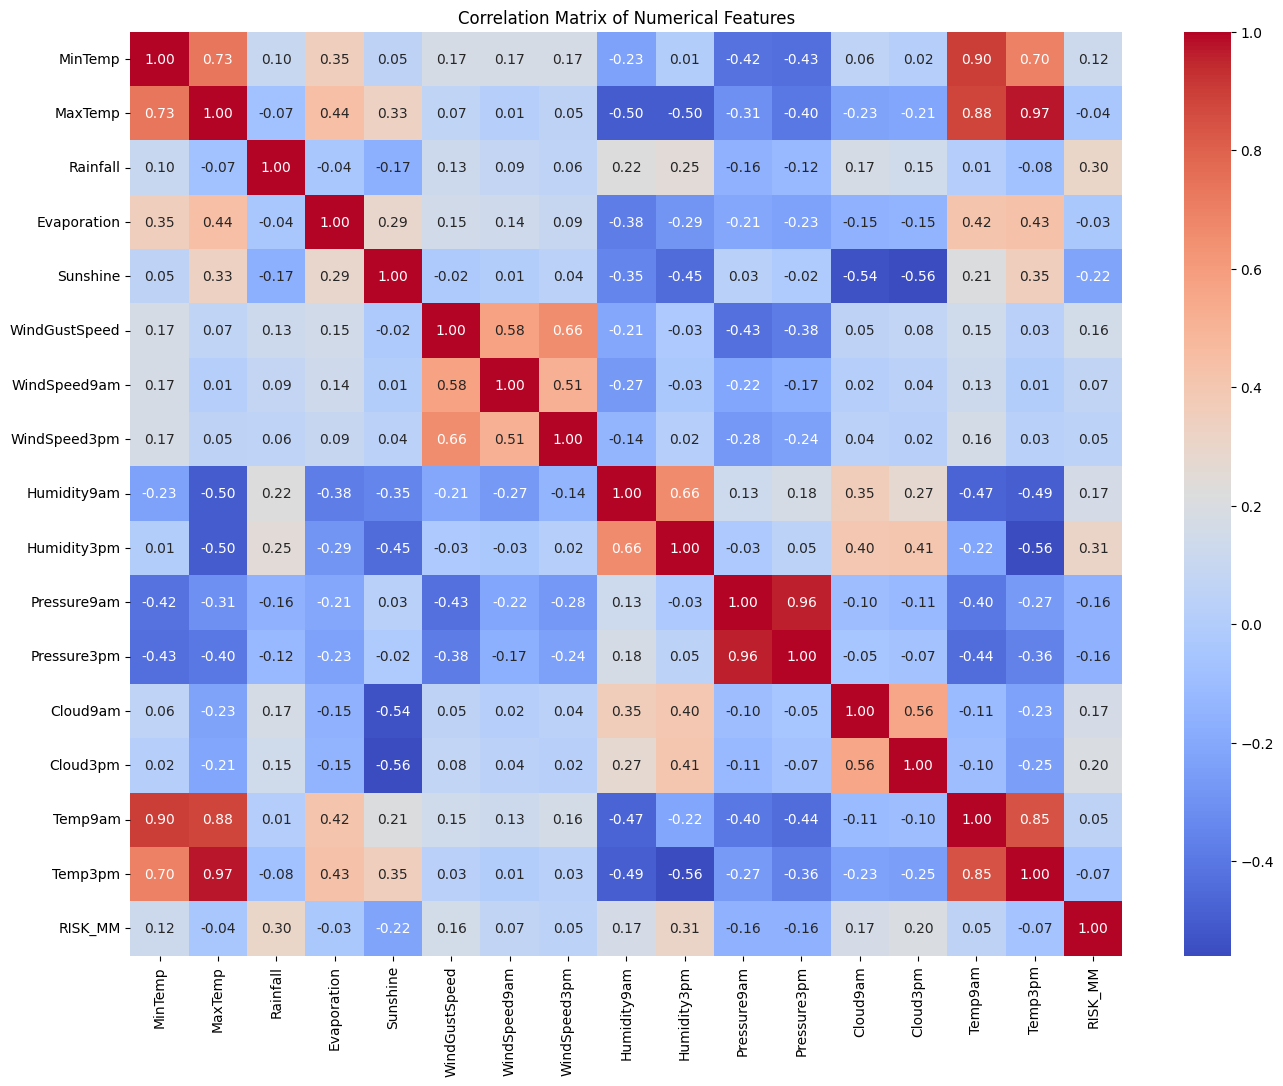

In [ ]:
# Select only numerical features for the heatmap
numerical_features = rf.select_dtypes(include=np.number)

# Create the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
rf.drop(['MinTemp', 'MaxTemp'], axis=1, inplace=True)

In [ ]:
#model training
features = rf.drop(['Evaporation', 'RainTomorrow'], axis=1)
target = rf.RainTomorrow

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (113754, 20)
X_test shape: (28439, 20)
y_train shape: (113754,)
y_test shape: (28439,)


**StandardScaler:**StandardScaler is a preprocessing technique in scikit-learn used for standardizing features by removing the mean and scaling to unit variance. StandardScaler, a popular preprocessing technique provided by scikit-learn, offers a simple yet effective method for standardizing feature values.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your DataFrame containing the features

# Select only numerical features for scaling
numerical_features = features.select_dtypes(include=np.number)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(numerical_features)

# Convert the scaled features back to a DataFrame
scaled_features_rf= pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Replace the original numerical features with the scaled ones in your features DataFrame
for column in numerical_features.columns:
  features[column] = scaled_features_rf[column]

# Now your features DataFrame has numerical features standardized

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder # Import OneHotEncoder
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**LabelEncoding:**Label encoding is a simple and effective way to convert categorical variables into numerical form. By using the LabelEncoder class from scikit-learn, you can easily encode your categorical data and prepare it for further analysis or input into machine learning algorithms.

In [ ]:
# Model training
features = rf.drop(['Evaporation', 'RainTomorrow', 'Date','WindGustDir','WindDir9am'], axis=1)
target = rf.RainTomorrow

# Convert 'RainTomorrow' to numerical using Label Encoding
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# Identify categorical features for encoding
categorical_features = features.select_dtypes(include=['object']).columns

**OneHotEncoder:**One-hot encoding is a technique used to convert categorical data into a binary format where each category is represented by a separate column with a 1 indicating its presence and 0s for all other categories

In [ ]:
# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features.select_dtypes(include=np.number).columns), # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # One-hot encode categorical features
    ])

# Create a pipeline with preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])


**RandomForestClassifier**:Random forest, a powerful machine learning algorithm, is used because it excels at reducing overfitting, improving accuracy, and handling both classification and regression tasks, while also providing insights into feature importance

**Pipeline:**
**Sklearn pipelines offer two main advantages:**
**Encapsulation**: Pipelines bundle all preprocessing and modeling steps into a single object. This makes your code cleaner and easier to manage. Reduced Code **Repetition:** You don't have to repeat preprocessing steps when trying different models.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Location', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [ ]:
# Make predictions and evaluate accuracy
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Using SVM For Better Advancements:**

SVMs are used in machine learning because they excel at both classification and regression tasks, are effective in high-dimensional spaces, can handle non-linear data using kernel functions, and are relatively resistant to overfitting

In [ ]:
from sklearn.svm import SVC


# Model training using SVM
features = rf.drop(['Evaporation', 'RainTomorrow', 'Date','WindGustDir','WindDir9am'], axis=1)
target = rf.RainTomorrow

# Convert 'RainTomorrow' to numerical using Label Encoding
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# Identify categorical features for encoding
categorical_features = features.select_dtypes(include=['object']).columns

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features.select_dtypes(include=np.number).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Create a pipeline with preprocessing and SVM classifier
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42)) # You can change the kernel
])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [ ]:
# Train the SVM model using the pipeline
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Location', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('classifier', SVC(kernel='linear', random_state=42))])

In [ ]:
# Make predictions and evaluate accuracy
y_pred = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.9994022293329583


Now again implement another model for better advancement in our dataset and

---

achieve best accuracy over SVM and RandomForest Classifier
**Logistic Regression:**
Logistic regression is often preferred over SVM and Random Forest classifiers for its simplicity, interpretability, and computational efficiency, making it suitable for tasks where understanding the model's decision-making process is crucial.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model training using Logistic Regression
features = rf.drop(['Evaporation', 'RainTomorrow', 'Date','WindGustDir','WindDir9am'], axis=1)
target = rf.RainTomorrow

# Convert 'RainTomorrow' to numerical using Label Encoding
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# Identify categorical features for encoding
categorical_features = features.select_dtypes(include=['object']).columns

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features.select_dtypes(include=np.number).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Create a pipeline with preprocessing and Logistic Regression classifier
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Train the Logistic Regression model using the pipeline
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Location', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
# Make predictions and evaluate accuracy
y_pred = lr_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9992264144308871


In machine learning, performance comparison involves evaluating and comparing different models or algorithms to determine which one performs best on a specific task, using metrics like accuracy, precision, recall, and F1-score.



**Choosing the Best Model:**
Different machine learning algorithms are suited for different problems. Comparing their performance helps you choose the most effective one for your specific needs.

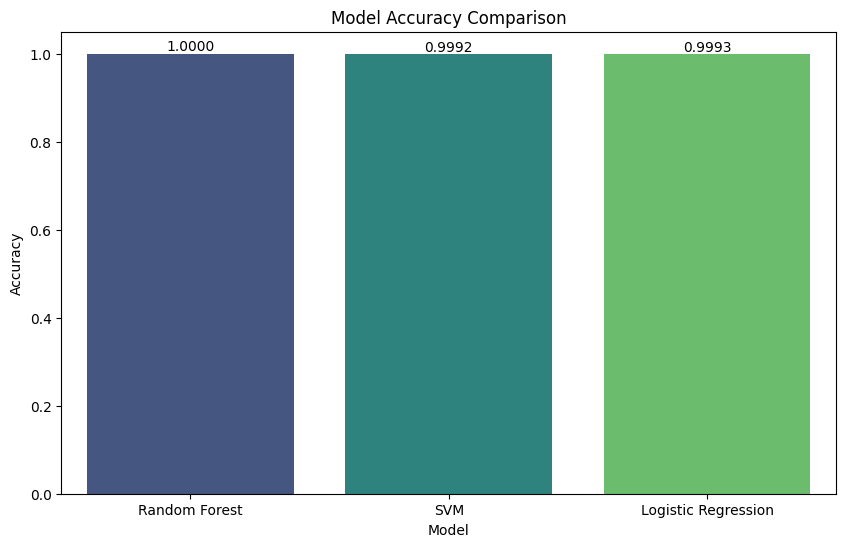

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample accuracy data (replace with your actual data)
accuracy_results = {
    "Random Forest": 1.00,
    "SVM": 0.9992,
    "Logistic Regression": 0.9993
}

accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# Create the bar plot with color visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette="viridis")  # Use a color palette
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Add value labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')

plt.show()


In [53]:
import joblib

In [54]:
joblib.dump(svm_pipeline, 'svm_model.pkl')

['svm_model.pkl']

In [55]:
!pip install Gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00


In [56]:
import gradio as gr
print(gr.__version__)

5.29.0


In [57]:
def greet(name):
  return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text",allow_flagging="never")
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://609ebb8961998765ac.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
